<a href="https://colab.research.google.com/github/Shahid-03/Project-I---Image-Processing/blob/main/VisionTransfer_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file (dataset.zip)
uploaded = files.upload()

# Import zipfile module
import zipfile

# Extract the ZIP file
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Verify the contents of the extracted folders
!ls /content/
!ls /content/Train/
!ls /content/Test/

Saving dataset.zip to dataset.zip
dataset.zip  __MACOSX  sample_data  Test  Train
anger  fear  joy  Natural  sadness  surprise
anger  fear  joy  Natural  sadness  surprise


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification
from sklearn.metrics import accuracy_score, classification_report

# Define paths (updated for Colab)
train_dir = '/content/Train'
test_dir = '/content/Test'

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ViT input size ##reduce size
    transforms.ToTensor(),          # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet stats
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Load pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=len(train_dataset.classes),
    ignore_mismatched_sizes=True  # Handle classifier size mismatch
)

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Checkpoint path to save the model
checkpoint_path = "/content/checkpoint.pth"

# Training loop with checkpoint saving
try:
    for epoch in range(20):  # Adjust epochs as needed
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Save the model after each epoch
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
        print(f"Model checkpoint saved at {checkpoint_path}")

except KeyboardInterrupt:
    # Save the model on interrupt
    print("Training interrupted. Saving model...")
    torch.save(model.state_dict(), checkpoint_path)
    print(f"Model checkpoint saved at {checkpoint_path}")

# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).logits
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Classification Report
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=train_dataset.classes)

print(f"ViT Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 1.365075354774793
Model checkpoint saved at /content/checkpoint.pth
Epoch 2, Loss: 0.8694292878111204
Model checkpoint saved at /content/checkpoint.pth
Epoch 3, Loss: 0.6079142292340597
Model checkpoint saved at /content/checkpoint.pth
Epoch 4, Loss: 0.45162519564231235
Model checkpoint saved at /content/checkpoint.pth
Epoch 5, Loss: 0.3864334678898255
Model checkpoint saved at /content/checkpoint.pth
Epoch 6, Loss: 0.35424925821522874
Model checkpoint saved at /content/checkpoint.pth
Epoch 7, Loss: 0.3274885043501854
Model checkpoint saved at /content/checkpoint.pth
Epoch 8, Loss: 0.3000432200108965
Model checkpoint saved at /content/checkpoint.pth
Epoch 9, Loss: 0.27319972092906636
Model checkpoint saved at /content/checkpoint.pth
Epoch 10, Loss: 0.26241150374213856
Model checkpoint saved at /content/checkpoint.pth
Epoch 11, Loss: 0.25750546250492334
Model checkpoint saved at /content/checkpoint.pth
Epoch 12, Loss: 0.25170335980753106
Model checkpoint saved at /content

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


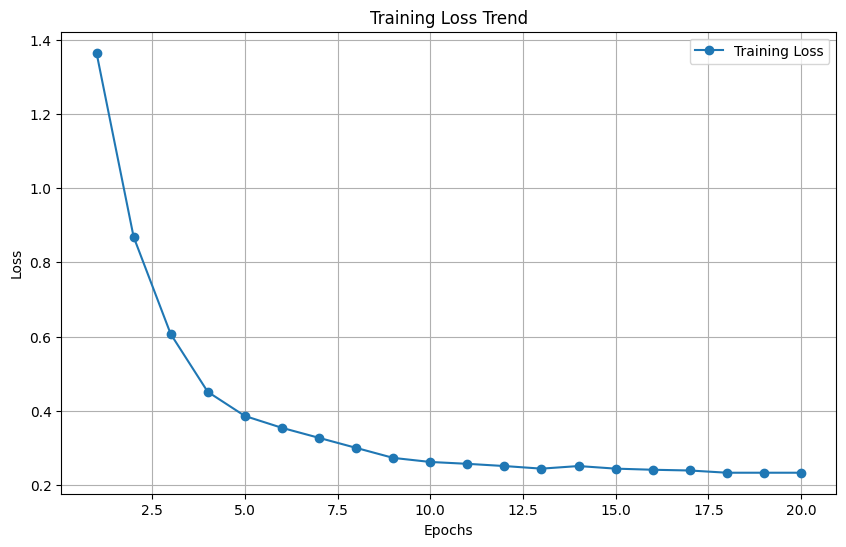

In [ ]:
import matplotlib.pyplot as plt

# Sample loss values per epoch (replace with your actual loss values)
loss_values = [1.365, 0.869, 0.607, 0.451, 0.386, 0.354, 0.327, 0.300, 0.273, 0.262,
               0.257, 0.251, 0.244, 0.251, 0.244, 0.241, 0.239, 0.233, 0.233, 0.233]

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Trend')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


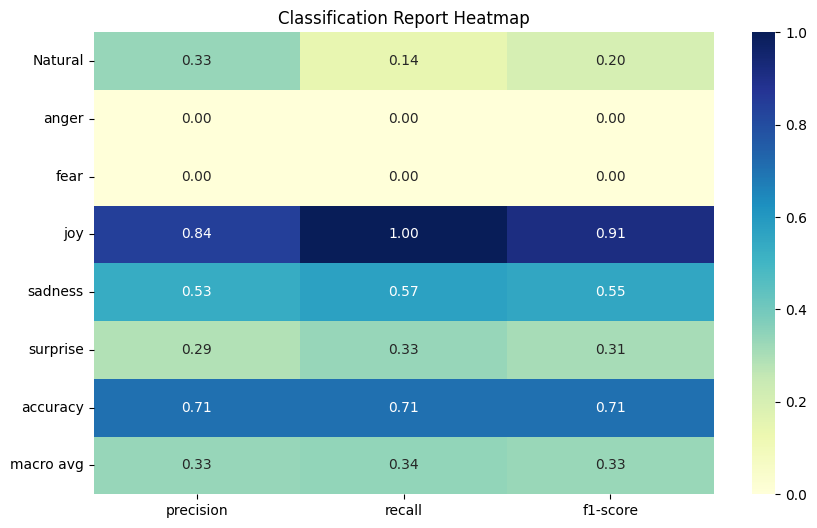

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=train_dataset.classes, output_dict=True)

# Create a DataFrame for the classification metrics
report_df = pd.DataFrame(report_dict).transpose()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Classification Report Heatmap")
plt.show()


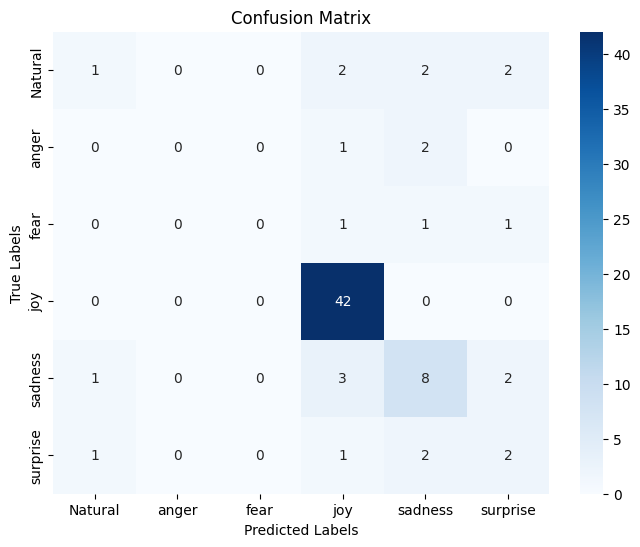

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


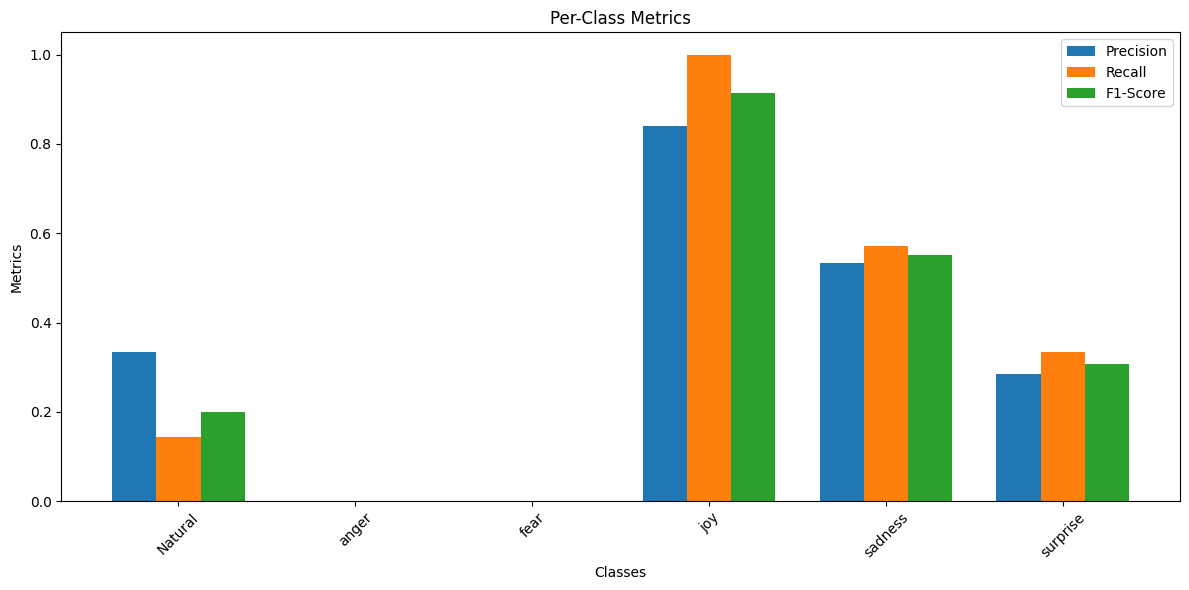

In [ ]:
# Extract per-class metrics
precision = report_df.loc[train_dataset.classes, 'precision']
recall = report_df.loc[train_dataset.classes, 'recall']
f1_score = report_df.loc[train_dataset.classes, 'f1-score']

# Plot per-class metrics
x = np.arange(len(train_dataset.classes))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

plt.xticks(x, train_dataset.classes, rotation=45)
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.title('Per-Class Metrics')
plt.legend()
plt.tight_layout()
plt.show()
